# PROYECTO FINAL NLP

### PROYECTO FINAL NLP

### Presentado Por:  Nadia Ñustes Pardo

1. Iniciamos llamando las librerías que vamos a utilizar

In [39]:
import pandas as pd
import tweepy
from textblob import TextBlob
import re
import time
from pprint import pprint
import json
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import googletrans
from googletrans import Translator

2. Realizamos el proceso de autenticación en la Api

In [2]:
keys = pd.read_csv("C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Claves_NLP_Twitter.txt", header=None)

In [3]:
keys = dict(zip(keys[0],keys[1]))

In [4]:
logueo = tweepy.OAuthHandler(keys['api_key'], keys['api_key_secret'])
logueo.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(logueo, wait_on_rate_limit=True)

3. Realizamos la recolección de Información

In [5]:
tweets = tweepy.Cursor(api.search,
                       lang='es',
                       geocode=f'4.649178,-74.062827,45mi',
                       tweet_mode='extended',
                       include_rts=False).items(1500)

In [6]:
for t in tweets:
    print (t)
    break

Status(_api=<tweepy.api.API object at 0x00000122AE79B948>, _json={'created_at': 'Sat Nov 28 04:42:36 +0000 2020', 'id': 1332545404668440576, 'id_str': '1332545404668440576', 'full_text': '@juan_joar Que hermosura es esta? 🔥😈🔥', 'truncated': False, 'display_text_range': [11, 37], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'juan_joar', 'name': 'Juan act', 'id': 1278192696524496896, 'id_str': '1278192696524496896', 'indices': [0, 10]}], 'urls': []}, 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': 1332330886600269828, 'in_reply_to_status_id_str': '1332330886600269828', 'in_reply_to_user_id': 1278192696524496896, 'in_reply_to_user_id_str': '1278192696524496896', 'in_reply_to_screen_name': 'juan_joar', 'user': {'id': 203204003, 'id_str': '203204003', 'name': 'Ace', 'screen_name': 'gatofire09', 'location': 'BOGOTÁ', 'de

In [8]:
t._json

{'created_at': 'Fri Nov 27 11:59:33 +0000 2020',
 'id': 1332292979093090305,
 'id_str': '1332292979093090305',
 'full_text': 'RT @AUGUSTOOCAMPO: Y los medios engañados por Nestor Humberto con la edición de un video, presentado fuera de contexto ? \n\nLuego de la reve…',
 'truncated': False,
 'display_text_range': [0, 140],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'AUGUSTOOCAMPO',
    'name': 'AUGUSTO A OCAMPO',
    'id': 142465457,
    'id_str': '142465457',
    'indices': [3, 17]}],
  'urls': []},
 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 149981613,
  'id_str': '149981613',
  'name': '#LideresSocialesEnLaCPI',
  'screen_name': 'ColombiaMuisca',


In [9]:
t = []

for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Bogotá")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t.append(temp)
    

In [10]:
datos = pd.DataFrame(t)

In [11]:
datos.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
datos

,tweet,date,city,user_location,id,link
0,RT @AUGUSTOOCAMPO: Acaba de quedar en evidenci...,2020-11-27 11:59:33,Bogotá,Bogota,1332292978229075969,https://twitter.com/i/web/status/1332292978229...
1,En la vereda Cataimita se sienten abandonados ...,2020-11-27 11:59:32,Bogotá,"Bogotá, Colombia",1332292973078298630,https://twitter.com/i/web/status/1332292973078...
2,"@gabolopezco Hola, si consideras vulnerados tu...",2020-11-27 11:59:29,Bogotá,Bogotá-Colombia,1332292960571039745,https://twitter.com/i/web/status/1332292960571...
3,RT @elespectador: #LoMásLeído en Salud: \nEsco...,2020-11-27 11:59:29,Bogotá,"Buenos Aires, Argentina",1332292960562589696,https://twitter.com/i/web/status/1332292960562...
4,#Actualidad | Precios del petróleo vienen con ...,2020-11-27 11:59:25,Bogotá,Bogotá - Colombia,1332292945920266243,https://twitter.com/i/web/status/1332292945920...
...,...,...,...,...,...,...
1494,RT @CAVENDISH09: @lcvelez Que esas encuestas s...,2020-11-27 11:45:04,Bogotá,,1332289333278232576,https://twitter.com/i/web/status/1332289333278...
1495,@urbimaria37 @neliafique @Vzla_asediada @Samur...,2020-11-27 11:45:04,Bogotá,"Madrid, Colombia",1332289332598681602,https://twitter.com/i/web/status/1332289332598...
1496,A ti te doy hasta la clave de mi cel.,2020-11-27 11:45:03,Bogotá,"Zipaquirá, Colombia",1332289331210366979,https://twitter.com/i/web/status/1332289331210...
1497,RT @themusicpimp: ¿Qué canción es su máquina d...,2020-11-27 11:45:03,Bogotá,Popayán / iles Nariño,1332289331080392704,https://twitter.com/i/web/status/1332289331080...


In [13]:
datos = datos[['tweet','date','city']]
datos.head(1500)

,tweet,date,city
0,RT @AUGUSTOOCAMPO: Acaba de quedar en evidenci...,2020-11-27 11:59:33,Bogotá
1,En la vereda Cataimita se sienten abandonados ...,2020-11-27 11:59:32,Bogotá
2,"@gabolopezco Hola, si consideras vulnerados tu...",2020-11-27 11:59:29,Bogotá
3,RT @elespectador: #LoMásLeído en Salud: \nEsco...,2020-11-27 11:59:29,Bogotá
4,#Actualidad | Precios del petróleo vienen con ...,2020-11-27 11:59:25,Bogotá
...,...,...,...
1494,RT @CAVENDISH09: @lcvelez Que esas encuestas s...,2020-11-27 11:45:04,Bogotá
1495,@urbimaria37 @neliafique @Vzla_asediada @Samur...,2020-11-27 11:45:04,Bogotá
1496,A ti te doy hasta la clave de mi cel.,2020-11-27 11:45:03,Bogotá
1497,RT @themusicpimp: ¿Qué canción es su máquina d...,2020-11-27 11:45:03,Bogotá


In [14]:
ruta ='C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets.csv'
datos.to_csv(ruta)

In [15]:
tweets = tweepy.Cursor(api.search,
                       lang='es',
                       geocode=f'6.25184,-75.56359,45mi',
                       tweet_mode='extended',
                       include_rts=False).items(1500)

In [16]:
for t in tweets:
    print (t)
    break

Status(_api=<tweepy.api.API object at 0x000002579B70DF88>, _json={'created_at': 'Fri Nov 27 14:25:52 +0000 2020', 'id': 1332329799008792576, 'id_str': '1332329799008792576', 'full_text': '@agudelo_m jajajaajajjajaajajajajajajaja q putas!!!', 'truncated': False, 'display_text_range': [11, 51], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'agudelo_m', 'name': 'Juan David Agudelo De FontanarRossa 🌺', 'id': 296479872, 'id_str': '296479872', 'indices': [0, 10]}], 'urls': []}, 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': 1332229601020538880, 'in_reply_to_status_id_str': '1332229601020538880', 'in_reply_to_user_id': 296479872, 'in_reply_to_user_id_str': '296479872', 'in_reply_to_screen_name': 'agudelo_m', 'user': {'id': 744765798363840513, 'id_str': '744765798363840513', 'name': 'Apolo', 'screen_name': 'apolocartacho', 'location': 

In [17]:
t._json

{'created_at': 'Fri Nov 27 14:25:52 +0000 2020',
 'id': 1332329799008792576,
 'id_str': '1332329799008792576',
 'full_text': '@agudelo_m jajajaajajjajaajajajajajajaja q putas!!!',
 'truncated': False,
 'display_text_range': [11, 51],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'agudelo_m',
    'name': 'Juan David Agudelo De FontanarRossa 🌺',
    'id': 296479872,
    'id_str': '296479872',
    'indices': [0, 10]}],
  'urls': []},
 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'},
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'in_reply_to_status_id': 1332229601020538880,
 'in_reply_to_status_id_str': '1332229601020538880',
 'in_reply_to_user_id': 296479872,
 'in_reply_to_user_id_str': '296479872',
 'in_reply_to_screen_name': 'agudelo_m',
 'user': {'id': 744765798363840513,
  'id_str': '744765798363840513',
  'name': 'Apolo',
  'screen_name': 'apolocartacho',
  'location': 'Medellín, Colombia',

In [18]:
t = []

for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Medellín")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t.append(temp)

In [19]:
datos = pd.DataFrame(t)

In [20]:
datos.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
datos

,tweet,date,city,user_location,id,link
0,@chuchoagudelo1 @LeonelJ24 @JPABLO96331135 @JP...,2020-11-27 14:25:49,Medellín,"Medellín, Colombia",1332329787474448392,https://twitter.com/i/web/status/1332329787474...
1,@jwniebubble @treasuremembers Si te pasan algu...,2020-11-27 14:25:49,Medellín,mi casita :),1332329786673405960,https://twitter.com/i/web/status/1332329786673...
2,@jecrir La gente está loca! 😂,2020-11-27 14:25:49,Medellín,"Rionegro, Colombia",1332329786363039749,https://twitter.com/i/web/status/1332329786363...
3,RT @_josele__: Luis Carlos Velez tiene bloquea...,2020-11-27 14:25:48,Medellín,Colombia,1332329784618192900,https://twitter.com/i/web/status/1332329784618...
4,"@MinSeg Son geniales, desde el minuto 1 dijero...",2020-11-27 14:25:46,Medellín,Holanda,1332329773373263876,https://twitter.com/i/web/status/1332329773373...
...,...,...,...,...,...,...
1494,@Glopame3_02F Buenos días 🌞 abrazos 🤗 bendicio...,2020-11-27 14:03:41,Medellín,medellin,1332324218172825601,https://twitter.com/i/web/status/1332324218172...
1495,"@Falabella_co son unos ladrones, yo compré alg...",2020-11-27 14:03:41,Medellín,"Medellín, Colombia",1332324215945646082,https://twitter.com/i/web/status/1332324215945...
1496,@PerlaToro Sí señora. Mi primera foto en mi se...,2020-11-27 14:03:40,Medellín,"Medellín, Colombia",1332324212493565954,https://twitter.com/i/web/status/1332324212493...
1497,RT @Army097l: En 27 dias de noviembre BTS ha g...,2020-11-27 14:03:40,Medellín,,1332324212250390531,https://twitter.com/i/web/status/1332324212250...


In [21]:
datos = datos[['tweet','date','city']]
datos.head(1500)

,tweet,date,city
0,@chuchoagudelo1 @LeonelJ24 @JPABLO96331135 @JP...,2020-11-27 14:25:49,Medellín
1,@jwniebubble @treasuremembers Si te pasan algu...,2020-11-27 14:25:49,Medellín
2,@jecrir La gente está loca! 😂,2020-11-27 14:25:49,Medellín
3,RT @_josele__: Luis Carlos Velez tiene bloquea...,2020-11-27 14:25:48,Medellín
4,"@MinSeg Son geniales, desde el minuto 1 dijero...",2020-11-27 14:25:46,Medellín
...,...,...,...
1494,@Glopame3_02F Buenos días 🌞 abrazos 🤗 bendicio...,2020-11-27 14:03:41,Medellín
1495,"@Falabella_co son unos ladrones, yo compré alg...",2020-11-27 14:03:41,Medellín
1496,@PerlaToro Sí señora. Mi primera foto en mi se...,2020-11-27 14:03:40,Medellín
1497,RT @Army097l: En 27 dias de noviembre BTS ha g...,2020-11-27 14:03:40,Medellín


In [22]:
ruta ='C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets_medellin.csv'
datos.to_csv(ruta)

In [23]:
tweets = tweepy.Cursor(api.search,
                       lang='es',
                       geocode=f'10.96854,-74.78132,45mi',
                       tweet_mode='extended',
                       include_rts=False).items(1500)

In [24]:
for t in tweets:
    print (t)
    break

Status(_api=<tweepy.api.API object at 0x000002579B70DF88>, _json={'created_at': 'Fri Nov 27 14:35:31 +0000 2020', 'id': 1332332228790132738, 'id_str': '1332332228790132738', 'full_text': 'Se respira una paz 🙏🏼', 'truncated': False, 'display_text_range': [0, 21], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 702948212995465216, 'id_str': '702948212995465216', 'name': 'Rafael David Mejia Villamil', 'screen_name': 'raa121089', 'location': 'Soledad, Colombia', 'description': '100% juniorista. 100% fiel a mi filosofía (un alto en el camino). fue un 12 de mayo 2018😍 = 20/10/2020 👶🏼', 'url': None, 'entities': {'description': {'ur

In [25]:
t._json

{'created_at': 'Fri Nov 27 14:35:31 +0000 2020',
 'id': 1332332228790132738,
 'id_str': '1332332228790132738',
 'full_text': 'Se respira una paz 🙏🏼',
 'truncated': False,
 'display_text_range': [0, 21],
 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []},
 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 702948212995465216,
  'id_str': '702948212995465216',
  'name': 'Rafael David Mejia Villamil',
  'screen_name': 'raa121089',
  'location': 'Soledad, Colombia',
  'description': '100% juniorista. 100% fiel a mi filosofía (un alto en el camino). fue un 12 de mayo 2018😍 = 20/10/2020 👶🏼',
  'url': None,
  'entities': {'description': {'urls': []}},
  'protected': False,
  'f

In [27]:
t = []

for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Barranquilla")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t.append(temp)

In [28]:
datos = pd.DataFrame(t)

In [29]:
datos.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
datos

,tweet,date,city,user_location,id,link
0,"RT @cDaniel1508: Uy, desde antes del 15. Ya to...",2020-11-27 14:18:57,Barranquilla,"Lima, Perú",1332328059110903810,https://twitter.com/i/web/status/1332328059110...
1,@INSColombia del @ministeriosalud dice en est...,2020-11-27 14:18:57,Barranquilla,Barranquilla,1332328059098308611,https://twitter.com/i/web/status/1332328059098...
2,Agárrenme hpta,2020-11-27 14:18:57,Barranquilla,"Barranquilla, Colombia",1332328058112659456,https://twitter.com/i/web/status/1332328058112...
3,"RT @JuanSalvadorB: Junior díassss, una decisi...",2020-11-27 14:18:56,Barranquilla,"Misuri, USA",1332328055579291655,https://twitter.com/i/web/status/1332328055579...
4,Kim Jong-un ordenó ejecutar a dos personas y p...,2020-11-27 14:18:56,Barranquilla,"Valledupar, Cesar, Colombia",1332328053280747522,https://twitter.com/i/web/status/1332328053280...
...,...,...,...,...,...,...
358,@IsabeLHdz05 O un Enano 😂😂,2020-11-27 14:13:43,Barranquilla,"Barranquilla, Colombia",1332326743378698240,https://twitter.com/i/web/status/1332326743378...
359,RT @FernandOdont: Escribo para recordarles que...,2020-11-27 14:13:42,Barranquilla,,1332326739301773314,https://twitter.com/i/web/status/1332326739301...
360,Ya se dieron cuenta las feministas que no pued...,2020-11-27 14:13:41,Barranquilla,"Barranquilla, Colombia",1332326733824077827,https://twitter.com/i/web/status/1332326733824...
361,Ya Petro destrozó las vidas de muchos magistra...,2020-11-27 14:13:40,Barranquilla,"Cartagena, Colombia",1332326728547643399,https://twitter.com/i/web/status/1332326728547...


In [30]:
datos = datos[['tweet','date','city']]
datos.head(1500)

,tweet,date,city
0,"RT @cDaniel1508: Uy, desde antes del 15. Ya to...",2020-11-27 14:18:57,Barranquilla
1,@INSColombia del @ministeriosalud dice en est...,2020-11-27 14:18:57,Barranquilla
2,Agárrenme hpta,2020-11-27 14:18:57,Barranquilla
3,"RT @JuanSalvadorB: Junior díassss, una decisi...",2020-11-27 14:18:56,Barranquilla
4,Kim Jong-un ordenó ejecutar a dos personas y p...,2020-11-27 14:18:56,Barranquilla
...,...,...,...
358,@IsabeLHdz05 O un Enano 😂😂,2020-11-27 14:13:43,Barranquilla
359,RT @FernandOdont: Escribo para recordarles que...,2020-11-27 14:13:42,Barranquilla
360,Ya se dieron cuenta las feministas que no pued...,2020-11-27 14:13:41,Barranquilla
361,Ya Petro destrozó las vidas de muchos magistra...,2020-11-27 14:13:40,Barranquilla


In [31]:
ruta ='C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets_barranquilla.csv'
datos.to_csv(ruta)

In [33]:
tweets = tweepy.Cursor(api.search,
                       lang='es',
                       geocode=f'3.43722,-76.5225,45mi',
                       tweet_mode='extended',
                       include_rts=False).items(1500)

In [34]:
for t in tweets:
    print (t)
    break

Status(_api=<tweepy.api.API object at 0x000002579B70DF88>, _json={'created_at': 'Fri Nov 27 14:47:18 +0000 2020', 'id': 1332335195253567490, 'id_str': '1332335195253567490', 'full_text': '"Si algo me pasa, los quiero", un corto animado de tan solo 12 minutos que te hará llorar. \n#Netflix #SiAlgoMePasaLosQuiero #moods', 'truncated': False, 'display_text_range': [0, 130], 'entities': {'hashtags': [{'text': 'Netflix', 'indices': [92, 100]}, {'text': 'SiAlgoMePasaLosQuiero', 'indices': [101, 123]}, {'text': 'moods', 'indices': [124, 130]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1272996667, 'id_str': '1272996667', 'name': 'Alexis lml', 'screen_n

In [35]:
t._json

{'created_at': 'Fri Nov 27 14:47:18 +0000 2020',
 'id': 1332335195253567490,
 'id_str': '1332335195253567490',
 'full_text': '"Si algo me pasa, los quiero", un corto animado de tan solo 12 minutos que te hará llorar. \n#Netflix #SiAlgoMePasaLosQuiero #moods',
 'truncated': False,
 'display_text_range': [0, 130],
 'entities': {'hashtags': [{'text': 'Netflix', 'indices': [92, 100]},
   {'text': 'SiAlgoMePasaLosQuiero', 'indices': [101, 123]},
   {'text': 'moods', 'indices': [124, 130]}],
  'symbols': [],
  'user_mentions': [],
  'urls': []},
 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1272996667,
  'id_str': '1272996667',
  'name': 'Alexis lml',
  'screen_name': 'alexisj19970',
  'location

In [36]:
t = []

for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Cali")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t.append(temp)

In [37]:
datos = pd.DataFrame(t)

In [38]:
datos.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
datos

,tweet,date,city,user_location,id,link
0,@SantiagoSotoS10 😍😍😍😍😍😍😍😍 agradézcanme porfa y...,2020-11-27 14:47:18,Cali,"Guadalajara de Buga, Colombia",1332335193848483842,https://twitter.com/i/web/status/1332335193848...
1,Quiero volver a tener 5 años 😞.,2020-11-27 14:47:18,Cali,Colombia,1332335192472760321,https://twitter.com/i/web/status/1332335192472...
2,Acaba de publicar una foto https://t.co/5zdhPq...,2020-11-27 14:47:17,Cali,colombia,1332335191663267843,https://twitter.com/i/web/status/1332335191663...
3,¡Buenos días mi señora divina! @victoriaruffo3...,2020-11-27 14:47:17,Cali,Colombia,1332335190350458883,https://twitter.com/i/web/status/1332335190350...
4,Desde Muy temprano en #ForosMIRA con la inform...,2020-11-27 14:47:17,Cali,Colombia,1332335189025026048,https://twitter.com/i/web/status/1332335189025...
...,...,...,...,...,...,...
1494,"RT @AdrianaLucia: Debería estar preso pero no,...",2020-11-27 14:40:18,Cali,Colombia RTMirar ♡Save,1332333432869969923,https://twitter.com/i/web/status/1332333432869...
1495,"@juliosolis_09 @jhonjamesmoreno Oe sejj, me di...",2020-11-27 14:40:18,Cali,Buenaventura,1332333431615877120,https://twitter.com/i/web/status/1332333431615...
1496,@conyapari Igual mi cony 💓🙏🙏🙏,2020-11-27 14:40:18,Cali,Colombia,1332333431418712065,https://twitter.com/i/web/status/1332333431418...
1497,RT @ValentinaAB10: Si realmente entendiéramos ...,2020-11-27 14:40:18,Cali,,1332333431137644549,https://twitter.com/i/web/status/1332333431137...


In [39]:
datos = datos[['tweet','date','city']]
datos.head(1500)

,tweet,date,city
0,@SantiagoSotoS10 😍😍😍😍😍😍😍😍 agradézcanme porfa y...,2020-11-27 14:47:18,Cali
1,Quiero volver a tener 5 años 😞.,2020-11-27 14:47:18,Cali
2,Acaba de publicar una foto https://t.co/5zdhPq...,2020-11-27 14:47:17,Cali
3,¡Buenos días mi señora divina! @victoriaruffo3...,2020-11-27 14:47:17,Cali
4,Desde Muy temprano en #ForosMIRA con la inform...,2020-11-27 14:47:17,Cali
...,...,...,...
1494,"RT @AdrianaLucia: Debería estar preso pero no,...",2020-11-27 14:40:18,Cali
1495,"@juliosolis_09 @jhonjamesmoreno Oe sejj, me di...",2020-11-27 14:40:18,Cali
1496,@conyapari Igual mi cony 💓🙏🙏🙏,2020-11-27 14:40:18,Cali
1497,RT @ValentinaAB10: Si realmente entendiéramos ...,2020-11-27 14:40:18,Cali


In [40]:
ruta ='C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets_cali.csv'
datos.to_csv(ruta)

In [49]:
tweets = tweepy.Cursor(api.search,
                       lang='es',
                       geocode=f'7.12539,-73.1198,45mi',
                       tweet_mode='extended',
                       include_rts=False).items(1500)

In [50]:
for t in tweets:
    print (t)
    break

Status(_api=<tweepy.api.API object at 0x000002579B70DF88>, _json={'created_at': 'Fri Nov 27 14:58:44 +0000 2020', 'id': 1332338069509431296, 'id_str': '1332338069509431296', 'full_text': '@quinterojose98 @Paulanrodri09 Esa es la actitud🤪', 'truncated': False, 'display_text_range': [31, 49], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'quinterojose98', 'name': 'Jose David', 'id': 1164887140527984642, 'id_str': '1164887140527984642', 'indices': [0, 15]}, {'screen_name': 'Paulanrodri09', 'name': 'PaulaRodríguez', 'id': 1103850312547348480, 'id_str': '1103850312547348480', 'indices': [16, 30]}], 'urls': []}, 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1332334056407756800, 'in_reply_to_status_id_str': '1332334056407756800', 'in_reply_to_user_id': 1164887140527984642, 'in_reply_to_user_id_str': '1164887140527984642', 

In [51]:
t._json

{'created_at': 'Fri Nov 27 14:58:44 +0000 2020',
 'id': 1332338069509431296,
 'id_str': '1332338069509431296',
 'full_text': '@quinterojose98 @Paulanrodri09 Esa es la actitud🤪',
 'truncated': False,
 'display_text_range': [31, 49],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'quinterojose98',
    'name': 'Jose David',
    'id': 1164887140527984642,
    'id_str': '1164887140527984642',
    'indices': [0, 15]},
   {'screen_name': 'Paulanrodri09',
    'name': 'PaulaRodríguez',
    'id': 1103850312547348480,
    'id_str': '1103850312547348480',
    'indices': [16, 30]}],
  'urls': []},
 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': 1332334056407756800,
 'in_reply_to_status_id_str': '1332334056407756800',
 'in_reply_to_user_id': 1164887140527984642,
 'in_reply_to_user_id_str': '1164887140527984642',
 'in_reply_t

In [52]:
t = []

for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Bucaramanga")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t.append(temp)

In [53]:
datos = pd.DataFrame(t)

In [54]:
datos.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
datos

,tweet,date,city,user_location,id,link
0,RT @BLUSantanderes: Cuarenta niños que partici...,2020-11-27 14:58:41,Bucaramanga,"Bogotá, D.C., Colombia",1332338060453883906,https://twitter.com/i/web/status/1332338060453...
1,Bastan 11 minutos de Lanthimos en Nimic para d...,2020-11-27 14:58:41,Bucaramanga,"Bucaramanga, Colombia",1332338058591674369,https://twitter.com/i/web/status/1332338058591...
2,@Raviolico1 @z3r0__0 @ZulemaVictoria3 Jajajaja...,2020-11-27 14:58:38,Bucaramanga,"Bucaramanga, Colombia",1332338044754677766,https://twitter.com/i/web/status/1332338044754...
3,Congreso de la República: Respaldo abierto al ...,2020-11-27 14:58:34,Bucaramanga,"Bucaramanga, Colombia",1332338029441245184,https://twitter.com/i/web/status/1332338029441...
4,"@laurapa9807 Feliz día también para sumercé, m...",2020-11-27 14:58:30,Bucaramanga,Bucaramanga,1332338010717904897,https://twitter.com/i/web/status/1332338010717...
...,...,...,...,...,...,...
1494,@serpra72 @ABucaramanga @APetrolera @Extratiem...,2020-11-27 13:26:03,Bucaramanga,"Bucaramanga, Colombia",1332314748482957319,https://twitter.com/i/web/status/1332314748482...
1495,RT @HGVMIO: @argenismiss @JulianBedoyaL17 El q...,2020-11-27 13:26:02,Bucaramanga,,1332314741268762625,https://twitter.com/i/web/status/1332314741268...
1496,"Cuando Bad Bunny dijo ""Te extraño por la noche...",2020-11-27 13:26:02,Bucaramanga,"Barrancabermeja, Colombia",1332314740798971905,https://twitter.com/i/web/status/1332314740798...
1497,RT @1Mariaisabel3: Cuando bad bunny dijo “tení...,2020-11-27 13:26:01,Bucaramanga,"Galapagar, España",1332314739913986050,https://twitter.com/i/web/status/1332314739913...


In [55]:
datos = datos[['tweet','date','city']]
datos.head(1500)

,tweet,date,city
0,RT @BLUSantanderes: Cuarenta niños que partici...,2020-11-27 14:58:41,Bucaramanga
1,Bastan 11 minutos de Lanthimos en Nimic para d...,2020-11-27 14:58:41,Bucaramanga
2,@Raviolico1 @z3r0__0 @ZulemaVictoria3 Jajajaja...,2020-11-27 14:58:38,Bucaramanga
3,Congreso de la República: Respaldo abierto al ...,2020-11-27 14:58:34,Bucaramanga
4,"@laurapa9807 Feliz día también para sumercé, m...",2020-11-27 14:58:30,Bucaramanga
...,...,...,...
1494,@serpra72 @ABucaramanga @APetrolera @Extratiem...,2020-11-27 13:26:03,Bucaramanga
1495,RT @HGVMIO: @argenismiss @JulianBedoyaL17 El q...,2020-11-27 13:26:02,Bucaramanga
1496,"Cuando Bad Bunny dijo ""Te extraño por la noche...",2020-11-27 13:26:02,Bucaramanga
1497,RT @1Mariaisabel3: Cuando bad bunny dijo “tení...,2020-11-27 13:26:01,Bucaramanga


In [56]:
ruta ='C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets_bucaramanga.csv'
datos.to_csv(ruta)

Cargue y union de tweets recolectados por ciudad

In [40]:
bogota = pd.read_csv("C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets_bogota.csv")
medellin = pd.read_csv("C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets_medellin.csv")
cali = pd.read_csv("C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets_cali.csv")
barranquilla = pd.read_csv("C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets_barranquilla.csv")
bucaramanga = pd.read_csv("C:/Users/Nadia/Documents/Especialización/NLP/Clases y Talleres/Proyecto/tweets_bucaramanga.csv")

df = pd.concat([bogota, medellin, cali, barranquilla, bucaramanga])
df

,Unnamed: 0,tweet,date,city
0,0,RT @AUGUSTOOCAMPO: Acaba de quedar en evidenci...,2020-11-27 11:59:33,Bogotá
1,1,En la vereda Cataimita se sienten abandonados ...,2020-11-27 11:59:32,Bogotá
2,2,"@gabolopezco Hola, si consideras vulnerados tu...",2020-11-27 11:59:29,Bogotá
3,3,RT @elespectador: #LoMásLeído en Salud: \nEsco...,2020-11-27 11:59:29,Bogotá
4,4,#Actualidad | Precios del petróleo vienen con ...,2020-11-27 11:59:25,Bogotá
...,...,...,...,...
1494,1494,@serpra72 @ABucaramanga @APetrolera @Extratiem...,2020-11-27 13:26:03,Bucaramanga
1495,1495,RT @HGVMIO: @argenismiss @JulianBedoyaL17 El q...,2020-11-27 13:26:02,Bucaramanga
1496,1496,"Cuando Bad Bunny dijo ""Te extraño por la noche...",2020-11-27 13:26:02,Bucaramanga
1497,1497,RT @1Mariaisabel3: Cuando bad bunny dijo “tení...,2020-11-27 13:26:01,Bucaramanga


Realizamos la exploración de tweets en el dataframe unificado df

In [8]:
df.columns

Index(['Unnamed: 0', 'tweet', 'date', 'city'], dtype='object')

In [9]:
cantidad = df['tweet'].count()

In [10]:
print ('Cantidad de tweets recolectados:' , cantidad)

Cantidad de tweets recolectados: 6359


In [11]:
cant_ciudad = df.groupby(['city']).size().reset_index(name = 'cantidad_tweets')
cant_ciudad

,city,cantidad_tweets
0,Barranquilla,363
1,Bogotá,1499
2,Bucaramanga,1499
3,Cali,1499
4,Medellín,1499


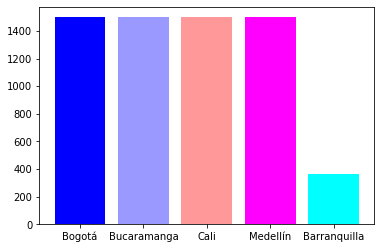

In [12]:
cant_ciudad = cant_ciudad.sort_values('cantidad_tweets', ascending = False)
plt.bar(cant_ciudad['city'],cant_ciudad['cantidad_tweets'], color = ['blue','#9999ff','#ff9999','magenta','cyan'], label='cantidad_tweets')
plt.show()


Se realizó un llamado de tweets de 1500 registros de los cuales para la ciudad de barranquilla se obtuvieron 363, por lo cual tenemos la siguiente participación de tweets por ciudad.

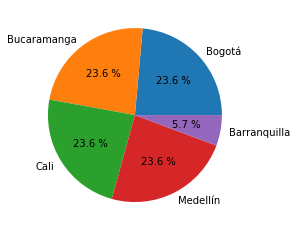

In [13]:
plt.pie(cant_ciudad['cantidad_tweets'], labels = cant_ciudad['city'], autopct = "%0.1f %%")
plt.show()

Debido a inconvenientes con la variable Translator el análisis se realiza para la ciudad de Bogotá

In [41]:
df = bogota
df.head()

,Unnamed: 0,tweet,date,city
0,0,RT @AUGUSTOOCAMPO: Acaba de quedar en evidenci...,2020-11-27 11:59:33,Bogotá
1,1,En la vereda Cataimita se sienten abandonados ...,2020-11-27 11:59:32,Bogotá
2,2,"@gabolopezco Hola, si consideras vulnerados tu...",2020-11-27 11:59:29,Bogotá
3,3,RT @elespectador: #LoMásLeído en Salud: \nEsco...,2020-11-27 11:59:29,Bogotá
4,4,#Actualidad | Precios del petróleo vienen con ...,2020-11-27 11:59:25,Bogotá


Preprocesamiento de la información
El preprocesamiento nos permite limpiar el contenido de los tweets

In [42]:
import re

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweet']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
             
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")
        
    return text, links, hashtags, mentions

In [43]:
df[['tweet_clean', 'links_2', 'hashtags', 'mentions']] = df.apply(text_clean, axis=1, result_type='expand')

In [44]:
df.head(2000)

,Unnamed: 0,tweet,date,city,tweet_clean,links_2,hashtags,mentions
0,0,RT @AUGUSTOOCAMPO: Acaba de quedar en evidenci...,2020-11-27 11:59:33,Bogotá,RT Acaba de quedar en evidencia el complot pa...,[],[],[@AUGUSTOOCAMPO:]
1,1,En la vereda Cataimita se sienten abandonados ...,2020-11-27 11:59:32,Bogotá,En la vereda Cataimita se sienten abandonados ...,[https://t.co/pT3Fm4OiLo],[],[]
2,2,"@gabolopezco Hola, si consideras vulnerados tu...",2020-11-27 11:59:29,Bogotá,"Hola, si consideras vulnerados tus derechos, ...","[https://t.co/F5wGpsHTUN,]",[],[@gabolopezco]
3,3,RT @elespectador: #LoMásLeído en Salud: \nEsco...,2020-11-27 11:59:29,Bogotá,RT en Salud: \nEscocia se convierte en el pr...,[],[#LoMásLeído],[@elespectador:]
4,4,#Actualidad | Precios del petróleo vienen con ...,2020-11-27 11:59:25,Bogotá,| Precios del petróleo vienen con tendencia a...,[https://t.co/evGCODYiC4],[#Actualidad],[]
...,...,...,...,...,...,...,...,...
1494,1494,RT @CAVENDISH09: @lcvelez Que esas encuestas s...,2020-11-27 11:45:04,Bogotá,"RT Que esas encuestas son rechimbas, son com...",[],[],"[@CAVENDISH09:, @lcvelez]"
1495,1495,@urbimaria37 @neliafique @Vzla_asediada @Samur...,2020-11-27 11:45:04,Bogotá,...,[],[],"[@urbimaria37, @neliafique, @Vzla_asediada, @S..."
1496,1496,A ti te doy hasta la clave de mi cel.,2020-11-27 11:45:03,Bogotá,A ti te doy hasta la clave de mi cel.,[],[],[]
1497,1497,RT @themusicpimp: ¿Qué canción es su máquina d...,2020-11-27 11:45:03,Bogotá,RT ¿Qué canción es su máquina del tiempo?,[https://t.co/HWsGql7OOW],[],[@themusicpimp:]


Luego de la limpieza de tweets iniciamos con la aplicación del análisis de sentimiento, pero primero debemos traducir el contenido del tweet_clean para aplicar la función

In [44]:
from langdetect import detect, detect_langs

In [18]:
    from googletrans import Translator

In [52]:
translator = Translator()
df['ing'] = df['tweet_clean'].apply(lambda valor: translator.translate(valor, src='es', dest='en'))
df.head()

,Unnamed: 0,tweet,date,city,tweet_clean,links_2,hashtags,mentions,ing
0,0,RT @AUGUSTOOCAMPO: Acaba de quedar en evidenci...,2020-11-27 11:59:33,Bogotá,RT Acaba de quedar en evidencia el complot pa...,[],[],[@AUGUSTOOCAMPO:],"Translated(src=en, dest=en, text=RT Acaba de ..."
1,1,En la vereda Cataimita se sienten abandonados ...,2020-11-27 11:59:32,Bogotá,En la vereda Cataimita se sienten abandonados ...,[https://t.co/pT3Fm4OiLo],[],[],"Translated(src=en, dest=en, text=En la vereda ..."
2,2,"@gabolopezco Hola, si consideras vulnerados tu...",2020-11-27 11:59:29,Bogotá,"Hola, si consideras vulnerados tus derechos, ...","[https://t.co/F5wGpsHTUN,]",[],[@gabolopezco],"Translated(src=en, dest=en, text= Hola, si con..."
3,3,RT @elespectador: #LoMásLeído en Salud: \nEsco...,2020-11-27 11:59:29,Bogotá,RT en Salud: \nEscocia se convierte en el pr...,[],[#LoMásLeído],[@elespectador:],"Translated(src=en, dest=en, text=RT en Salud..."
4,4,#Actualidad | Precios del petróleo vienen con ...,2020-11-27 11:59:25,Bogotá,| Precios del petróleo vienen con tendencia a...,[https://t.co/evGCODYiC4],[#Actualidad],[],"Translated(src=en, dest=en, text= | Precios de..."


In [53]:
df['ingles_trad'] = df['ing'].apply(lambda valor: valor.text)
df.head()

,Unnamed: 0,tweet,date,city,tweet_clean,links_2,hashtags,mentions,ing,ingles_trad
0,0,RT @AUGUSTOOCAMPO: Acaba de quedar en evidenci...,2020-11-27 11:59:33,Bogotá,RT Acaba de quedar en evidencia el complot pa...,[],[],[@AUGUSTOOCAMPO:],"Translated(src=en, dest=en, text=RT Acaba de ...",RT Acaba de quedar en evidencia el complot pa...
1,1,En la vereda Cataimita se sienten abandonados ...,2020-11-27 11:59:32,Bogotá,En la vereda Cataimita se sienten abandonados ...,[https://t.co/pT3Fm4OiLo],[],[],"Translated(src=en, dest=en, text=En la vereda ...",En la vereda Cataimita se sienten abandonados ...
2,2,"@gabolopezco Hola, si consideras vulnerados tu...",2020-11-27 11:59:29,Bogotá,"Hola, si consideras vulnerados tus derechos, ...","[https://t.co/F5wGpsHTUN,]",[],[@gabolopezco],"Translated(src=en, dest=en, text= Hola, si con...","Hola, si consideras vulnerados tus derechos, ..."
3,3,RT @elespectador: #LoMásLeído en Salud: \nEsco...,2020-11-27 11:59:29,Bogotá,RT en Salud: \nEscocia se convierte en el pr...,[],[#LoMásLeído],[@elespectador:],"Translated(src=en, dest=en, text=RT en Salud...",RT en Salud: \nEscocia se convierte en el pr...
4,4,#Actualidad | Precios del petróleo vienen con ...,2020-11-27 11:59:25,Bogotá,| Precios del petróleo vienen con tendencia a...,[https://t.co/evGCODYiC4],[#Actualidad],[],"Translated(src=en, dest=en, text= | Precios de...",| Precios del petróleo vienen con tendencia a...


In [55]:
vader = SentimentIntensityAnalyzer()

df['sentimiento'] = df['ingles_trad'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
df.head()      


,Unnamed: 0,tweet,date,city,tweet_clean,links_2,hashtags,mentions,ing,ingles_trad,sentimiento
0,0,RT @AUGUSTOOCAMPO: Acaba de quedar en evidenci...,2020-11-27 11:59:33,Bogotá,RT Acaba de quedar en evidencia el complot pa...,[],[],[@AUGUSTOOCAMPO:],"Translated(src=en, dest=en, text=RT Acaba de ...",RT Acaba de quedar en evidencia el complot pa...,0.0
1,1,En la vereda Cataimita se sienten abandonados ...,2020-11-27 11:59:32,Bogotá,En la vereda Cataimita se sienten abandonados ...,[https://t.co/pT3Fm4OiLo],[],[],"Translated(src=en, dest=en, text=En la vereda ...",En la vereda Cataimita se sienten abandonados ...,0.0
2,2,"@gabolopezco Hola, si consideras vulnerados tu...",2020-11-27 11:59:29,Bogotá,"Hola, si consideras vulnerados tus derechos, ...","[https://t.co/F5wGpsHTUN,]",[],[@gabolopezco],"Translated(src=en, dest=en, text= Hola, si con...","Hola, si consideras vulnerados tus derechos, ...",0.0
3,3,RT @elespectador: #LoMásLeído en Salud: \nEsco...,2020-11-27 11:59:29,Bogotá,RT en Salud: \nEscocia se convierte en el pr...,[],[#LoMásLeído],[@elespectador:],"Translated(src=en, dest=en, text=RT en Salud...",RT en Salud: \nEscocia se convierte en el pr...,0.0
4,4,#Actualidad | Precios del petróleo vienen con ...,2020-11-27 11:59:25,Bogotá,| Precios del petróleo vienen con tendencia a...,[https://t.co/evGCODYiC4],[#Actualidad],[],"Translated(src=en, dest=en, text= | Precios de...",| Precios del petróleo vienen con tendencia a...,0.0


In [103]:
df = df[['tweet_clean', 'sentimiento']].sort_values('sentimiento')
df.head(1500)

,tweet_clean,sentimiento
688,Yo viendo los spoilers de The Mandalorian porq...,-0.9081
1188,"Crean en ustedes, crean en el proceso y lo más...",-0.8951
144,Parce nooooooo! 😭😭😭,-0.8622
1115,Que horror Tomas Uribe! De política no conoce...,-0.8264
419,la empresa llevó una semana solicitando ate...,-0.8038
...,...,...
1134,Así es \nLA VIDA es lo que importa. \n✌✌✌💙,0.9300
1149,AMÉN 🙏 GRACIAS ❤ ENITH. IGUAL PARA TI UN ABRA...,0.9468
661,AMÉN 🙏 GRACIAS ❤ CARMEN.. GRACIAS POR TU SALU...,0.9682
1414,AMÉN 🙏 GRACIAS ❤ SCARCARLETT. FELIZ DÍA. BEND...,0.9732


Tweets más positivos 🤗

In [104]:
df.loc[1022]['tweet_clean']

' La mujer más hermosa de Monteria.\nNo hay palabras para explicar tanta belleza\n😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍'

In [105]:
df.loc[1414]['tweet_clean']

' AMÉN 🙏 GRACIAS ❤ SCARCARLETT. FELIZ DÍA. BENDICIONES Y UN ABRAZO 🤗 CUIDATE MUCHO. ♥ FELIZ FINDE. ♥ 🤗 ♥️ '

In [106]:
df.loc[661]['tweet_clean']

' AMÉN 🙏 GRACIAS ❤ CARMEN.. GRACIAS POR TU SALUDO. ASÍ ES AMIGA. TODO CON CALMA ES MEJOR. QUE TENGAS UN EXCELENTE DÍA. BENDICIONES Y UN ABRAZO 🤗 CUIDATE MUCHO. ♥ 🤗 🤗 ♥️ FELIZ FIN DE SEMANA. '

Tweets más Negativos 😢

In [109]:
df.loc[688]['tweet_clean']

'Yo viendo los spoilers de The Mandalorian porque es tendencia mundial.\n\nEMOS ZIDO VENDESIDOS\n\nGracias, Dave 😭😭😭😭 '

In [110]:
df.loc[1188]['tweet_clean']

'Crean en ustedes, crean en el proceso y lo más importante no dejen de intentar.\nHoy orgullosamente soy selección Caldas para el campeonato nacional de Downhill 2020.\nValio la pena, cada levantada en la madrugada lo valió todo, cada sufrimiento valió!!!\n💥🔥🔥🔥🚴🏼\u200d♀️ '

In [111]:
df.loc[144]['tweet_clean']

' Parce nooooooo! 😭😭😭'

In [112]:
df[['tweet_clean', 'sentimiento']].head(100)

,tweet_clean,sentimiento
688,Yo viendo los spoilers de The Mandalorian porq...,-0.9081
1188,"Crean en ustedes, crean en el proceso y lo más...",-0.8951
144,Parce nooooooo! 😭😭😭,-0.8622
1115,Que horror Tomas Uribe! De política no conoce...,-0.8264
419,la empresa llevó una semana solicitando ate...,-0.8038
...,...,...
1377,"RT el representante ""Hasta que no nos vacun...",-0.5267
1256,"RT Dichosos los que tienen en quien confiar, ...",-0.5267
868,"RT Dichosos los que tienen en quien confiar, ...",-0.5267
1396,"RT Dichosos los que tienen en quien confiar, ...",-0.5267


In [113]:
df[df.sentimiento > 0.5][['tweet_clean', 'sentimiento']].head()

,tweet_clean,sentimiento
1213,Lindo viernes!😍,0.5093
162,Que hermosa nuestra mamita María! 😍🙏🏻,0.5093
239,RT “Nada es más honorable que un corazón agra...,0.5423
232,RT “Nada es más honorable que un corazón agra...,0.5423
405,“Nada es más honorable que un corazón agradeci...,0.5423


In [117]:
def x_range(x):
   if x > 0:
    return 'Positivo'
   elif x == 0:
    return 'Neutro'
   else:
    return 'Negativo'

In [118]:
df['result'] = df['sentimiento'].apply(x_range)
df.head()

,tweet_clean,sentimiento,result
688,Yo viendo los spoilers de The Mandalorian porq...,-0.9081,Negativo
1188,"Crean en ustedes, crean en el proceso y lo más...",-0.8951,Negativo
144,Parce nooooooo! 😭😭😭,-0.8622,Negativo
1115,Que horror Tomas Uribe! De política no conoce...,-0.8264,Negativo
419,la empresa llevó una semana solicitando ate...,-0.8038,Negativo


In [121]:
cantidad = df.groupby(['result']).size().reset_index(name = 'cantidad_tweets')
cantidad

,result,cantidad_tweets
0,Negativo,314
1,Neutro,1067
2,Positivo,118


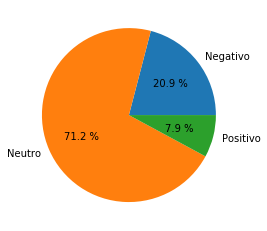

In [124]:
plt.pie(cant_ciudad['cantidad_tweets'], labels = cant_ciudad['result'], autopct = "%0.1f %%")
plt.show()

Luego del análisis de sentimientos realizado clasificaremos los tweets en 10 categorías, los cuales se asignaran de acuerdo al contenido gramatical

Convertimos todo el texto em minusculas

In [189]:
df = pd.DataFrame(df['tweet_clean'])
df

,tweet_clean
688,Yo viendo los spoilers de The Mandalorian porq...
1188,"Crean en ustedes, crean en el proceso y lo más..."
144,Parce nooooooo! 😭😭😭
1115,Que horror Tomas Uribe! De política no conoce...
419,la empresa llevó una semana solicitando ate...
...,...
1134,Así es \nLA VIDA es lo que importa. \n✌✌✌💙
1149,AMÉN 🙏 GRACIAS ❤ ENITH. IGUAL PARA TI UN ABRA...
661,AMÉN 🙏 GRACIAS ❤ CARMEN.. GRACIAS POR TU SALU...
1414,AMÉN 🙏 GRACIAS ❤ SCARCARLETT. FELIZ DÍA. BEND...


Tokenización

El procesamiento de Tokenización separa una cadena de texto en fases u otros simbolos con el objetivo de explorar cada una de las palabras conteniadas en el tweet

In [225]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords_sp]
    texto = " ".join([spanishStemmer.stem(palabra) for palabra in texto])
    texto = texto.strip() # Quitar espacios del principio
    texto = texto.split() # Tokenización
    return texto



In [226]:
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')

from nltk.stem.snowball import SnowballStemmer
spanishStemmer=SnowballStemmer("spanish")

df['Word'] = df['tweet_clean'].apply(lambda texto: pre_procesado(texto))
df.head() 

,tweet_clean,pre-procesado,Word
688,Yo viendo los spoilers de The Mandalorian porq...,viend spoilers the mandalori tendenci mundial ...,"[viend, spoilers, the, mandalori, tendenci, mu..."
1188,"Crean en ustedes, crean en el proceso y lo más...",cre usted cre proces import dej intent hoy org...,"[cre, usted, cre, proces, import, dej, intent,..."
144,Parce nooooooo! 😭😭😭,parc noooooo,"[parc, noooooo]"
1115,Que horror Tomas Uribe! De política no conoce...,horror tom urib polit conoc teor vay practic p...,"[horror, tom, urib, polit, conoc, teor, vay, p..."
419,la empresa llevó una semana solicitando ate...,empres llev seman solicit atencion client mand...,"[empres, llev, seman, solicit, atencion, clien..."


In [244]:
word = df['Word']
dict (word)
##word = word.values.tolist()
print (word)

688     [Yo, viendo, los, spoilers, de, The, Mandalori...
1188    [Crean, en, ustedes,, crean, en, el, proceso, ...
144                               [Parce, nooooooo!, 😭😭😭]
1115    [Que, horror, Tomas, Uribe!, De, política, no,...
419     [la, empresa, llevó, una, semana, solicitando,...
                              ...                        
1134     [Así, es, LA, VIDA, es, lo, que, importa., ✌✌✌💙]
1149    [AMÉN, 🙏, GRACIAS, ❤, ENITH., IGUAL, PARA, TI,...
661     [AMÉN, 🙏, GRACIAS, ❤, CARMEN.., GRACIAS, POR, ...
1414    [AMÉN, 🙏, GRACIAS, ❤, SCARCARLETT., FELIZ, DÍA...
1022    [La, mujer, más, hermosa, de, Monteria., No, h...
Name: Word, Length: 1499, dtype: object


In [245]:
import nltk

In [246]:
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')

In [247]:
palabras = [palabra for palabra in word if palabra not in stopwords_sp]
    palabras

[['Yo',
  'viendo',
  'los',
  'spoilers',
  'de',
  'The',
  'Mandalorian',
  'porque',
  'es',
  'tendencia',
  'mundial.',
  'EMOS',
  'ZIDO',
  'VENDESIDOS',
  'Gracias,',
  'Dave',
  '😭😭😭😭'],
 ['Crean',
  'en',
  'ustedes,',
  'crean',
  'en',
  'el',
  'proceso',
  'y',
  'lo',
  'más',
  'importante',
  'no',
  'dejen',
  'de',
  'intentar.',
  'Hoy',
  'orgullosamente',
  'soy',
  'selección',
  'Caldas',
  'para',
  'el',
  'campeonato',
  'nacional',
  'de',
  'Downhill',
  '2020.',
  'Valio',
  'la',
  'pena,',
  'cada',
  'levantada',
  'en',
  'la',
  'madrugada',
  'lo',
  'valió',
  'todo,',
  'cada',
  'sufrimiento',
  'valió!!!',
  '💥🔥🔥🔥🚴🏼\u200d♀️'],
 ['Parce', 'nooooooo!', '😭😭😭'],
 ['Que',
  'horror',
  'Tomas',
  'Uribe!',
  'De',
  'política',
  'no',
  'conoce,',
  'y',
  'eso,',
  'la',
  'teoría.',
  'Y',
  'vaya',
  'que',
  'la',
  'práctica,',
  'no',
  'la',
  'puede',
  'practicar',
  'con',
  'nosotros.',
  'Sería',
  'un',
  'país',
  'lleno',
  'de',
  'c